In [51]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [52]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [53]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [54]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

69.6872920559623 -84.74526274529391
76.17613596866562 -2.6314335721231714
59.02302949129984 127.59450950968909
15.103342682784032 159.7509805375313
-84.78680634853139 41.87685752023418
63.00182275996801 -2.471549046796156
-6.3015564005471845 -44.251865766140696
-72.87326446204654 150.36767727386837
86.40251376059913 26.608667770519332
-9.149647526419884 12.915700198047489
-70.23493376593674 116.58327506963985
-19.97918807645172 159.26059673033058
20.38404039027357 -135.5283886564206
1.7714129738805582 -137.36492986021264
49.99535638072024 115.39062657406714
36.61906396880673 -93.21392619441131
-69.3569959038864 121.74647006951216
-68.92814017224485 -7.982096630049426
46.97605990360128 -125.51272636568518
44.17303123420197 20.528416526955226
-30.24297237240348 18.02677935649166
6.207549212505853 -140.9282106516704
-5.481187487134733 -1.067256711734501
11.252737935871366 -34.27391376004371
-51.597955118533875 80.04476049536783
-60.67464719446764 86.99184052344214
43.314713299893015 -92.7

In [55]:
from citipy import citipy

In [56]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)


625

In [57]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [58]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2dfa97fe5c341645bd8de866876e6c48


In [59]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [60]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.

try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        
# If an error is experienced, skip the city.
except:
        print("City not found. Skipping...")
        pass

    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | clyde river
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | tommot
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | brae
Processing Record 7 of Set 1 | mirador
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | longyearbyen
Processing Record 10 of Set 1 | luanda
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | poum
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | nizhniy tsasuchey
Processing Record 16 of Set 1 | ozark
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | hoquiam
Processing Record 19 of Set 1 | arandelovac
Processing Record 20 of Set 1 | springbok
Processing Record 21 of Set 1 | takoradi
Processing Record 22 of Set 1 | sao filipe
Processing Record 23 of Set 1 | mahebourg
Proc

Processing Record 1 of Set 5 | lar gerd
Processing Record 2 of Set 5 | saint anthony
Processing Record 3 of Set 5 | safaga
Processing Record 4 of Set 5 | krasnoarmeysk
Processing Record 5 of Set 5 | houma
Processing Record 6 of Set 5 | khatanga
Processing Record 7 of Set 5 | ngukurr
Processing Record 8 of Set 5 | taganak
Processing Record 9 of Set 5 | ocampo
Processing Record 10 of Set 5 | bogo
Processing Record 11 of Set 5 | sibolga
Processing Record 12 of Set 5 | schladming
Processing Record 13 of Set 5 | camacha
Processing Record 14 of Set 5 | santa isabel
Processing Record 15 of Set 5 | flinders
Processing Record 16 of Set 5 | bambous virieux
Processing Record 17 of Set 5 | beloha
Processing Record 18 of Set 5 | sungaipenuh
Processing Record 19 of Set 5 | langarud
Processing Record 20 of Set 5 | chambishi
Processing Record 21 of Set 5 | sidi ali
Processing Record 22 of Set 5 | binghamton
Processing Record 23 of Set 5 | castro
Processing Record 24 of Set 5 | tumannyy
Processing Reco

Processing Record 1 of Set 9 | igarka
Processing Record 2 of Set 9 | boffa
Processing Record 3 of Set 9 | aktau
Processing Record 4 of Set 9 | leningradskiy
Processing Record 5 of Set 9 | san bartolome de tirajana
Processing Record 6 of Set 9 | partenit
Processing Record 7 of Set 9 | navan
Processing Record 8 of Set 9 | tautira
Processing Record 9 of Set 9 | mbandaka
Processing Record 10 of Set 9 | prince rupert
Processing Record 11 of Set 9 | santa rita
Processing Record 12 of Set 9 | sedelnikovo
Processing Record 13 of Set 9 | poltava
Processing Record 14 of Set 9 | duz
Processing Record 15 of Set 9 | jabinyanah
Processing Record 16 of Set 9 | fortuna
Processing Record 17 of Set 9 | erdenet
Processing Record 18 of Set 9 | provideniya
Processing Record 19 of Set 9 | ortakoy
Processing Record 20 of Set 9 | presidencia roque saenz pena
Processing Record 21 of Set 9 | miraflores
Processing Record 22 of Set 9 | arraial do cabo
Processing Record 23 of Set 9 | nome
Processing Record 24 of S

Processing Record 1 of Set 13 | izhmorskiy
Processing Record 2 of Set 13 | saquarema
Processing Record 3 of Set 13 | guaruja
Processing Record 4 of Set 13 | bambanglipuro
Processing Record 5 of Set 13 | songadh
Processing Record 6 of Set 13 | liuzhou
Processing Record 7 of Set 13 | djambala
Processing Record 8 of Set 13 | bani walid
Processing Record 9 of Set 13 | pyinmana
Processing Record 10 of Set 13 | hemsedal
Processing Record 11 of Set 13 | burnie
Processing Record 12 of Set 13 | whitianga
Processing Record 13 of Set 13 | aykhal
Processing Record 14 of Set 13 | lar
Processing Record 15 of Set 13 | paungde
Processing Record 16 of Set 13 | khandbari
Processing Record 17 of Set 13 | ust-kamchatsk
Processing Record 18 of Set 13 | neutraubling
Processing Record 19 of Set 13 | balikpapan
Processing Record 20 of Set 13 | chibuto
Processing Record 21 of Set 13 | valdosta
Processing Record 22 of Set 13 | kaihua
Processing Record 23 of Set 13 | bontang
Processing Record 24 of Set 13 | yazo

In [61]:
len(city_data)

1

In [62]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kidero,42.1932,45.9614,31.62,83,16,2.82,RU,2022-11-17 19:34:45


In [63]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kidero,RU,2022-11-17 19:34:45,42.1932,45.9614,31.62,83,16,2.82


In [64]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [65]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

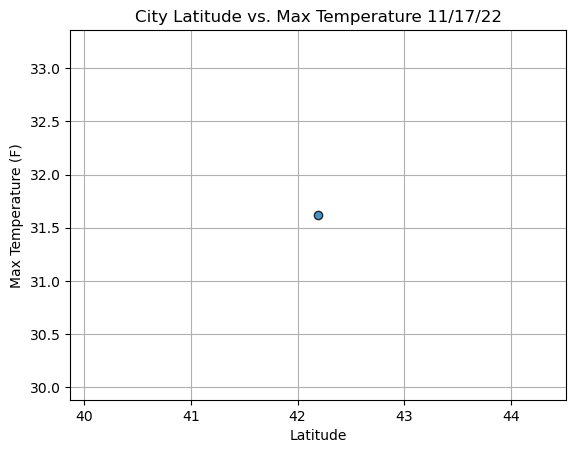

In [66]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

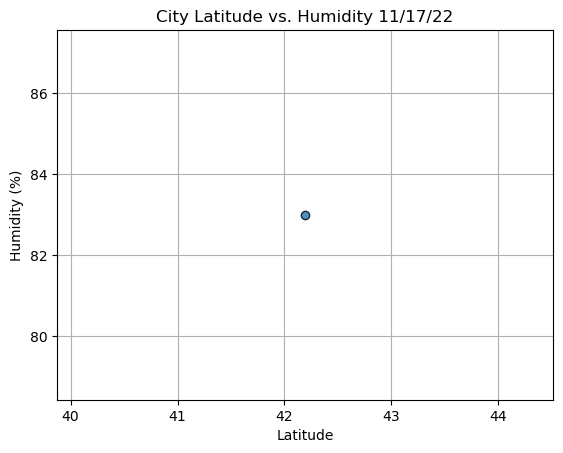

In [67]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

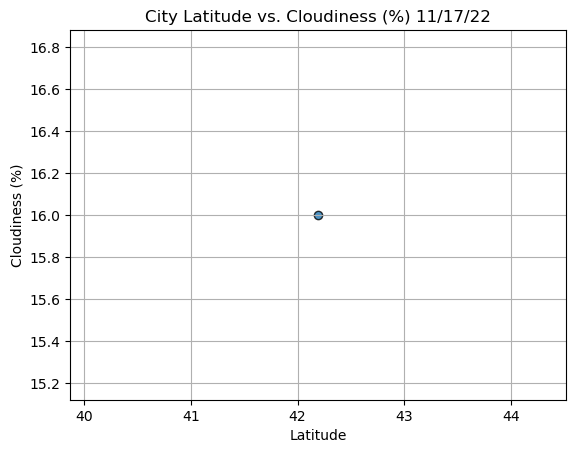

In [68]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

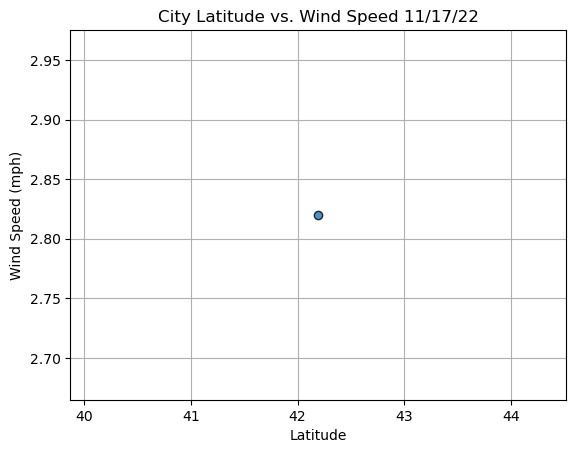

In [69]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()